In [1]:
import os
import subprocess
import datetime as dt
import itertools
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [15]:
years=[1991,2020]
basepath='/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/data/obs/NOAA_OISST/combined/'
savepath='/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/OISST/'
fout=savepath+f'oisst-avhrr-v02r01.regridded1x1g2.monthly.{years[0]}_{years[-1]}.nc'

In [3]:
fmod='/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/newHindcastMonthly/sst_HC_l0_1991_2020.nc'
fmod=xr.open_dataset(fmod)

In [4]:
fmod

<xarray.Dataset> Size: 4GB
Dimensions:     (S: 360, M: 40, Y: 180, X: 360, lon: 360, lat: 180)
Coordinates:
  * lon         (lon) float64 3kB 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * lat         (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * M           (M) int64 320B 1 2 3 4 5 6 7 8 9 ... 32 33 34 35 36 37 38 39 40
  * S           (S) int64 3kB 252 253 254 255 256 257 ... 607 608 609 610 611
Dimensions without coordinates: Y, X
Data variables:
    start_time  (S) int64 3kB ...
    sst         (S, M, Y, X) float32 4GB ...

In [5]:
#get all files
flistD=[]
flistM=[]
for iy in range(years[0],years[1]+1):
    for im in range(1,13):
        fD=f'{basepath}oisst-avhrr-v02r01.{iy}{im:02}_daily.nc'
        fM=f'{basepath}oisst-avhrr-v02r01.{iy}{im:02}_monthly.nc'
        flistD.append(fD)
        flistM.append(fM)

In [6]:
fM=xr.open_mfdataset(flistM,parallel=True)
fM

<xarray.Dataset> Size: 6GB
Dimensions:  (time: 360, zlev: 1, lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * time     (time) datetime64[ns] 3kB 1991-01-16T12:00:00 ... 2020-12-16T12:...
  * zlev     (zlev) float32 4B 0.0
Data variables:
    anom     (time, zlev, lat, lon) float32 1GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    err      (time, zlev, lat, lon) float32 1GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    ice      (time, zlev, lat, lon) float32 1GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    sst      (time, zlev, lat, lon) float32 1GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
Attributes: (12/38)
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.19910101.nc
    naming_authority:           gov.noaa.ncei
    summary:                    NOAAs 1/4-degree Daily Optimum Interpolation ...
    cdm_data_type:              Grid
    ...                         ...
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR
    Conventions:                CF-1.6, ACDD-1.3
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    NCO:                        netCDF Operators version 5.0.5 (Homepage = ht...

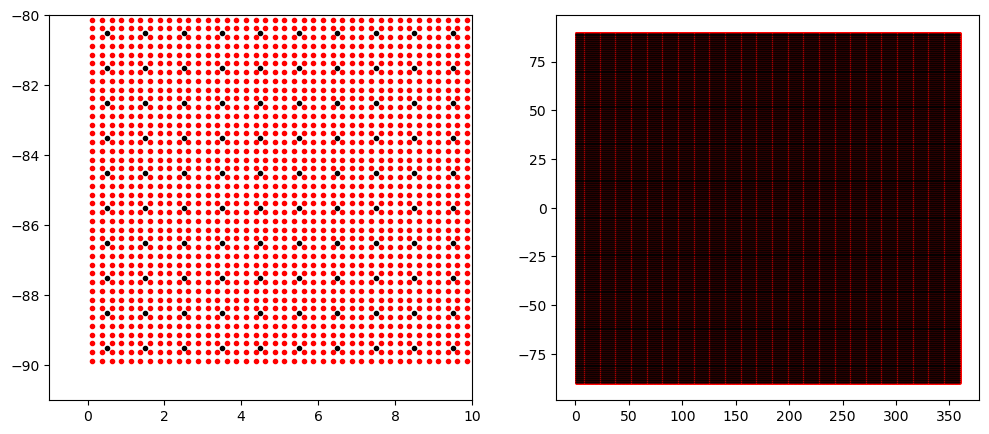

In [7]:
x,y=np.meshgrid(fM.lon,fM.lat)
x2,y2=np.meshgrid(fmod.lon,fmod.lat)
fig,[ax,ax2]=plt.subplots(1,2,figsize=(12,5))
ax.plot(x,y,'r.');
ax.plot(x2,y2,'k.');
ax.set_xlim(-1,10)
ax.set_ylim(-91,-80)
ax2.plot(x,y,'r.',ms=1);
ax2.plot(x2,y2,'k.',ms=1);

In [8]:
fM

<xarray.Dataset> Size: 6GB
Dimensions:  (time: 360, zlev: 1, lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * time     (time) datetime64[ns] 3kB 1991-01-16T12:00:00 ... 2020-12-16T12:...
  * zlev     (zlev) float32 4B 0.0
Data variables:
    anom     (time, zlev, lat, lon) float32 1GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    err      (time, zlev, lat, lon) float32 1GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    ice      (time, zlev, lat, lon) float32 1GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    sst      (time, zlev, lat, lon) float32 1GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
Attributes: (12/38)
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.19910101.nc
    naming_authority:           gov.noaa.ncei
    summary:                    NOAAs 1/4-degree Daily Optimum Interpolation ...
    cdm_data_type:              Grid
    ...                         ...
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR
    Conventions:                CF-1.6, ACDD-1.3
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    NCO:                        netCDF Operators version 5.0.5 (Homepage = ht...

In [9]:
data={}
for ivar in ['sst','ice']:
    data[ivar]=fM[ivar].coarsen({'lat':4,'lon':4}).mean().data[:,0,:,:]

In [10]:
data0=fM['err']**2
data['err']=data0.coarsen({'lat':4,'lon':4}).mean().data[:,0,:,:]**(1/2)

In [11]:
data['err']

dask.array<pow, shape=(360, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>

In [12]:
data['sst']

dask.array<getitem, shape=(360, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>

In [13]:
data['ice']

dask.array<getitem, shape=(360, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>

In [14]:
fM.sst.attrs

{'long_name': 'Daily sea surface temperature',
 'units': 'Celsius',
 'valid_min': -300,
 'valid_max': 4500,
 'cell_methods': 'time: mean'}

In [17]:
dsout=xr.Dataset(data_vars={'sst':(('S','Y','X'),data['sst'],fM.sst.attrs),
                            'ice':(('S','Y','X'),data['ice'],fM.ice.attrs),
                            'err':(('S','Y','X'),data['err'],fM.err.attrs),
                            'lat':fmod.lat,
                            'lon':fmod.lon,
                            'time':(('S',),fM.time.values),
                            'time2':fmod.start_time,},
                 coords={'S':fmod.S,'Y':fmod.Y,'X':fmod.X})

In [18]:
dsout.to_netcdf(fout,'w')

In [17]:
fM.close()
fmod.close()

In [1]:
import itertools
import datetime as dt

In [3]:
for iy in range(2021,2025):
    for im in range(1,13):
        flist=['/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/data/obs/NOAA_OISST/'+f'oisst-avhrr-v02r01.{iy}{im:02}{id:02}.nc' for id in \
               itertools.takewhile(lambda x : (dt.datetime(iy,im,1)+dt.timedelta(days=x-1)).month==im, (el for el in range(1,33)))]

In [4]:
flist

['/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/data/obs/NOAA_OISST/oisst-avhrr-v02r01.20241201.nc',
 '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/data/obs/NOAA_OISST/oisst-avhrr-v02r01.20241202.nc',
 '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/data/obs/NOAA_OISST/oisst-avhrr-v02r01.20241203.nc',
 '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/data/obs/NOAA_OISST/oisst-avhrr-v02r01.20241204.nc',
 '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/data/obs/NOAA_OISST/oisst-avhrr-v02r01.20241205.nc',
 '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/data/obs/NOAA_OISST/oisst-avhrr-v02r01.20241206.nc',
 '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/data/obs/NOAA_OISST/oisst-avhrr-v02r01.20241207.nc',
 '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/data/obs/NOAA_OISST/oisst-avhrr-v02r01.20241208.nc',
 '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/data/obs/NOAA_OISST/oisst-avhrr-v02r01.20241209.nc',
 '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/dat

In [5]:
184*30

5520

In [7]:
cd ../MHW_Forecasts_New

/fs/homeu2/eccc/crd/ccrn_shr/reo000/MHW/MHW_Forecasts_New


In [8]:
from MHW_daily_calcs import *

In [13]:

fMHW=fnameCanESMMHWDetrSmooth(workdir, 1993, 2023, 5, 0,.9)

In [14]:
ff=xr.open_dataset(fMHW,decode_times=False)

In [15]:
ff

<xarray.Dataset> Size: 1GB
Dimensions:   (reftime: 378, r: 20, lat: 60, lon: 360)
Coordinates:
    leadtime  float64 8B ...
  * reftime   (reftime) int64 3kB 0 31 59 90 120 ... 11382 11413 11443 11474
  * r         (r) int64 160B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * lat       (lat) float64 480B -89.5 -88.5 -87.5 -86.5 ... -32.5 -31.5 -30.5
  * lon       (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Data variables:
    isMHW     (reftime, r, lat, lon) float64 1GB ...
    MHW_prob  (reftime, lat, lon) float64 65MB ...

In [17]:
ff.leadtime.values

array(135.)

In [19]:
ff.reftime

<xarray.DataArray 'reftime' (reftime: 378)> Size: 3kB
array([    0,    31,    59, ..., 11413, 11443, 11474])
Coordinates:
    leadtime  float64 8B 135.0
  * reftime   (reftime) int64 3kB 0 31 59 90 120 ... 11382 11413 11443 11474
Attributes:
    units:     days since 1993-01-01 00:00:00
    calendar:  proleptic_gregorian

In [20]:
ff0=xr.open_dataset(fnameCanESMMHWDetrSmooth(workdir, 1993, 2023, 0, 0,.9),decode_times=False)

In [21]:
ff0.leadtime.values

array(15.)

In [22]:
ff0.leadtime

<xarray.DataArray 'leadtime' ()> Size: 8B
array(15.)
Coordinates:
    leadtime  float64 8B 15.0
Attributes:
    long_name:      Time elapsed since the start of the forecast
    standard_name:  forecast_period
    units:          hours

In [24]:
135/24

5.625

In [28]:
ff2=xr.open_dataset(fnameOISSTDaily(2020,2),decode_times=False)

In [29]:
ff2

<xarray.Dataset> Size: 481MB
Dimensions:  (time: 29, zlev: 1, lat: 720, lon: 1440)
Coordinates:
  * time     (time) float64 232B 1.537e+04 1.537e+04 ... 1.54e+04 1.54e+04
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * zlev     (zlev) float32 4B 0.0
Data variables:
    anom     (time, zlev, lat, lon) float32 120MB ...
    err      (time, zlev, lat, lon) float32 120MB ...
    ice      (time, zlev, lat, lon) float32 120MB ...
    sst      (time, zlev, lat, lon) float32 120MB ...
Attributes: (12/38)
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    naming_authority:           gov.noaa.ncei
    cdm_data_type:              Grid
    date_modified:              2020-02-16T11:01:00Z
    date_created:               2020-02-16T11:01:00Z
    processing_level:           NOAA Level 4
    ...                         ...
    summary:                    NOAAs 1/4-degree Daily Optimum Interpolation ...
    product_version:            Version v02r01
    platform:                   Ships, buoys, Argo floats, MetOp-A, MetOp-B
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    id:                         oisst-avhrr-v02r01.20200201.nc
    NCO:                        netCDF Operators version 5.0.5 (Homepage = ht...

In [30]:
ff2.time

<xarray.DataArray 'time' (time: 29)> Size: 232B
array([15371., 15372., 15373., 15374., 15375., 15376., 15377., 15378., 15379.,
       15380., 15381., 15382., 15383., 15384., 15385., 15386., 15387., 15388.,
       15389., 15390., 15391., 15392., 15393., 15394., 15395., 15396., 15397.,
       15398., 15399.])
Coordinates:
  * time     (time) float64 232B 1.537e+04 1.537e+04 ... 1.54e+04 1.54e+04
Attributes:
    long_name:     Center time of the day
    units:         days since 1978-01-01 12:00:00
    cell_methods:  time: mean

In [31]:
ff2.sst

<xarray.DataArray 'sst' (time: 29, zlev: 1, lat: 720, lon: 1440)> Size: 120MB
[30067200 values with dtype=float32]
Coordinates:
  * time     (time) float64 232B 1.537e+04 1.537e+04 ... 1.54e+04 1.54e+04
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * zlev     (zlev) float32 4B 0.0
Attributes:
    long_name:     Daily sea surface temperature
    valid_min:     -300
    valid_max:     4500
    units:         Celsius
    cell_methods:  time: mean